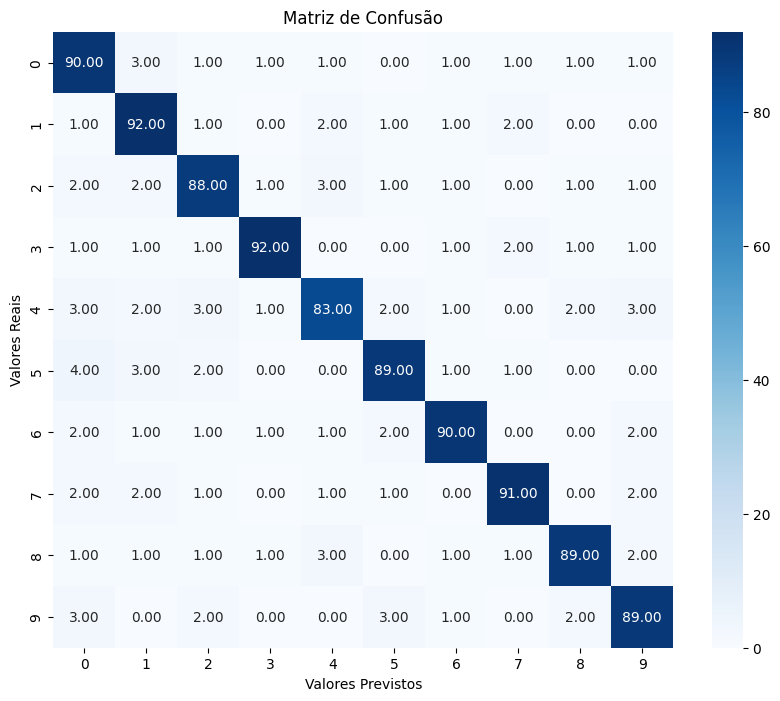

Sensibilidade para a classe 0: 0.90
Sensibilidade para a classe 1: 0.92
Sensibilidade para a classe 2: 0.88
Sensibilidade para a classe 3: 0.92
Sensibilidade para a classe 4: 0.83
Sensibilidade para a classe 5: 0.89
Sensibilidade para a classe 6: 0.90
Sensibilidade para a classe 7: 0.91
Sensibilidade para a classe 8: 0.89
Sensibilidade para a classe 9: 0.89


Especificidade para cada classe 0: 0.98
Especificidade para cada classe 1: 0.98
Especificidade para cada classe 2: 0.99
Especificidade para cada classe 3: 0.99
Especificidade para cada classe 4: 0.99
Especificidade para cada classe 5: 0.99
Especificidade para cada classe 6: 0.99
Especificidade para cada classe 7: 0.99
Especificidade para cada classe 8: 0.99
Especificidade para cada classe 9: 0.99

Acuracidade (calculo manual): 0.89
Acuracidade (sklearn): 0.89

Precisão para a classe 0: 0.83
Precisão para a classe 1: 0.86
Precisão para a classe 2: 0.87
Precisão para a classe 3: 0.95
Precisão para a classe 4: 0.88
Precisão para a cl

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Parametros para uma simulação de uma matriz de confusão
num_classes = 10
samples_per_class = 100
accuracy = 0.90

# Gerar y_true e y_pred
y_true = np.repeat(range(num_classes), samples_per_class)
y_pred = []

for true_label in y_true:
    if np.random.rand() < accuracy:
        # Predição correta
        y_pred.append(true_label)
    else:
        # Predição incorreta
        wrong_label = np.random.choice([x for x in range(num_classes) if x != true_label])
        y_pred.append(wrong_label)

y_pred = np.array(y_pred)

# Gera a Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a mateiz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title("Matriz de Confusão")
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

# Sensibilidade
sensitivity = np.diag(cm) / np.sum(cm, axis=1)
for i, sens in enumerate(sensitivity):
    print(f"Sensibilidade para a classe {i}: {sens:.2f}")
print("\n")

# Calcula a Especificidade para cada classe
# Especificidade = TN / (TN + FP)
specificity = []
for i in range(len(cm)):
    # TN: "True Negatives" (Soma de todos os elementos, excluindo a linha e coluna da classe)
    tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
    # FP: "False Positives" (Soma da coluna da classe, exluindo o elemento da diagonal)
    fp = np.sum(cm[:, i]) - cm[i, i]
    # Formula da Especificidade
    specificity_value = tn / (tn + fp)
    specificity.append(specificity_value)
for i, spec in enumerate(specificity):
    print(f"Especificidade para cada classe {i}: {spec:.2f}")

from sklearn.metrics import confusion_matrix, accuracy_score

# Calculo da Acuracidade
# Acuracidade = (TP + TN) / (Total de Predições)
correct_predictions = cm.diagonal().sum()  # Soma da Diagonal (TP + TN)
total_predictions = cm.sum()               # Numero total de elementos na matriz
accuracy_manual = correct_predictions / total_predictions
accuracy_sklearn = accuracy_score(y_true, y_pred) # Só para comparar
print(f"\nAcuracidade (calculo manual): {accuracy_manual:.2f}")
print(f"Acuracidade (sklearn): {accuracy_sklearn:.2f}\n")

# Função para calcular a precisão manual
precisions = []
for i in range(len(cm)):
    tp = cm[i, i]  # TPs
    fp = np.sum(cm[:, i]) - tp  # FPs
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    precisions.append(precision)
for i, precision in enumerate(precisions):
    print(f"Precisão para a classe {i}: {precision:.2f}")
print("\n")

# Calcula o F-score para cada classe
f_scores = []
for i in range(len(cm)):
    precision = precisions[i]
    recall = sensitivity[i]
    # F-score formula
    f_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f_scores.append(f_score)
for i, f_score in enumerate(f_scores):
    print(f"F-score para a classe {i}: {f_score:.2f}")